In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
new_url = f"{url}appid={api_key}&units={units}&q="
response = requests.get(new_url + "austin").json()
response

{'coord': {'lon': -97.74, 'lat': 30.27},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 41.23,
  'pressure': 1025,
  'humidity': 72,
  'temp_min': 39.56,
  'temp_max': 42.98},
 'visibility': 16093,
 'wind': {'speed': 8.05, 'deg': 350, 'gust': 8.2},
 'clouds': {'all': 75},
 'dt': 1544324160,
 'sys': {'type': 1,
  'id': 3344,
  'message': 0.0039,
  'country': 'US',
  'sunrise': 1544361362,
  'sunset': 1544398248},
 'id': 4671654,
 'name': 'Austin',
 'cod': 200}

In [15]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

new_url = f"{url}appid={api_key}&units={units}&q="

# set up lists to hold reponse info
lat = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
names = []

for city in cities:
    try:
        response = requests.get(new_url + city).json()
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        names.append(response['name'])
        print(f"Looking up information for city #{(response['id'])}: {city}")
    except:
        print("City not Found.")



Looking up information for city #2696650: alvik
Looking up information for city #6165406: thompson
Looking up information for city #2075265: busselton
Looking up information for city #4020109: atuona
Looking up information for city #4030556: rikitea
City not Found.
Looking up information for city #1015776: bredasdorp
Looking up information for city #3863379: mar del plata
Looking up information for city #1006984: east london
Looking up information for city #3832899: viedma
Looking up information for city #2125693: evensk
City not Found.
Looking up information for city #6170031: tuktoyaktuk
Looking up information for city #3378644: georgetown
Looking up information for city #2109528: buala
Looking up information for city #1264976: leh
City not Found.
Looking up information for city #2126199: cherskiy
City not Found.
Looking up information for city #286621: salalah
Looking up information for city #2175403: bluff
Looking up information for city #5106834: albany
Looking up information for 

Looking up information for city #5969025: haines junction
City not Found.
Looking up information for city #3833062: venado tuerto
City not Found.
Looking up information for city #2122262: palana
Looking up information for city #535438: levokumskoye
Looking up information for city #1254133: tuensang
Looking up information for city #7626370: bud
Looking up information for city #3530097: champerico
Looking up information for city #1273409: dataganj
Looking up information for city #3582228: dangriga
Looking up information for city #3872395: las cruces
Looking up information for city #546105: nikolskoye
Looking up information for city #2142316: yeppoon
Looking up information for city #2338660: yaan
Looking up information for city #2013727: vanavara
Looking up information for city #2156643: mount gambier
Looking up information for city #3164565: vila
Looking up information for city #2030065: mandalgovi
Looking up information for city #3453439: ponta do sol
City not Found.
Looking up informat

Looking up information for city #2225940: yatou
Looking up information for city #146639: lasa
Looking up information for city #2126123: chokurdakh
Looking up information for city #2063042: port hedland
Looking up information for city #5965462: gravelbourg
Looking up information for city #1028434: quelimane
Looking up information for city #5960603: geraldton
City not Found.
Looking up information for city #1528998: yumen
Looking up information for city #1793900: changli
Looking up information for city #2016307: solnechnyy
Looking up information for city #6690297: saint-leu
Looking up information for city #3728097: les cayes
Looking up information for city #6620339: karratha
Looking up information for city #1633419: padang
Looking up information for city #3391371: porto franco
Looking up information for city #2146268: toowoomba
Looking up information for city #155307: nyalikungu
City not Found.
Looking up information for city #5850554: makakilo city
Looking up information for city #36983

Looking up information for city #2171069: colac
Looking up information for city #3433715: goya
City not Found.
Looking up information for city #605155: kiruna
Looking up information for city #2362909: banfora
Looking up information for city #1610538: kabin buri
Looking up information for city #2026861: berdigestyakh
Looking up information for city #240210: birao
Looking up information for city #3979216: camalu
City not Found.
Looking up information for city #3151056: inndyr
Looking up information for city #262462: saint george
Looking up information for city #2447513: arlit
Looking up information for city #1152222: mae hong son
Looking up information for city #3571913: marsh harbour
Looking up information for city #3627382: sao miguel
Looking up information for city #2033225: zalantun
Looking up information for city #1835848: seoul
City not Found.
Looking up information for city #5477090: lovington
Looking up information for city #3379507: bartica
Looking up information for city #21117

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:

weather_dict = {
    "name": names,
    "lat": lat,
    "temp": temp,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "wind_speed": wind_speed,
}
weather_data = pd.DataFrame(weather_dict)

weather_data.to_csv("../WeatherData.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

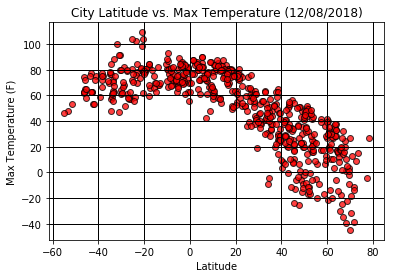

In [20]:
plt.scatter(lat, temp, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Max Temperature (12/08/2018)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(color='black', linestyle='-', linewidth=1)
plt.savefig("../LatVsTemp.png")

#### Latitude vs. Humidity Plot

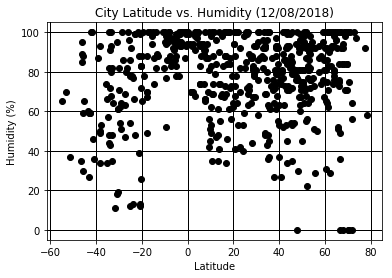

In [23]:
plt.scatter(lat, humidity, marker="o", facecolors="black", edgecolors="black")
plt.title("City Latitude vs. Humidity (12/08/2018)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(color='black', linestyle='-', linewidth=1)
plt.savefig("../LatVsHumidity.png")

#### Latitude vs. Cloudiness Plot

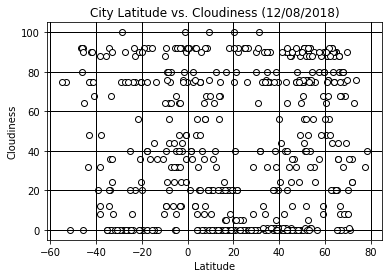

In [25]:

plt.scatter(lat, cloudiness, marker="o", facecolors="white", edgecolors="black")
plt.title("City Latitude vs. Cloudiness (12/08/2018)")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(color='black', linestyle='-', linewidth=1)
plt.savefig("../LatVsCloudiness.png")

#### Latitude vs. Wind Speed Plot

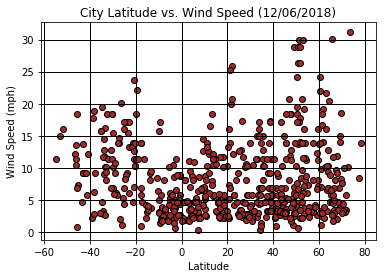

In [28]:
plt.scatter(lat, wind_speed, marker="o", facecolors="brown", edgecolors="black")
plt.title("City Latitude vs. Wind Speed (12/06/2018)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(color='black', linestyle='-', linewidth=1)
plt.savefig("../LatVsWindSpeed.png")

In [ ]:
#There does not apprear to be any coorolation between latitude and wind speed
#There does not apprear to be any coorolation between latitude and cloudiness
#There does not apprear to be any coorolation between latitude and humidity
#The further away from the equator, the more likely a city is to have a lowe
